In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### DATA LOADING

In [ ]:
df = pd.read_csv('covid-data.csv')

# Explore the data structurte
---

In [ ]:
df.head()
df.info()
df.describe()

## check the data quality

In [ ]:
df.isnull().sum()

In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Handle missing values if any
df.dropna() # or df.fillna()

In [ ]:
print(df.columns.tolist())


### FILTERING DATA OUT FOR INDIA

In [ ]:
india_df = df[df['location'] == 'India'].copy()
# Check NaN percentage per column
nan_percent = (india_df.isnull().sum() / len(india_df)) * 100
print(nan_percent.sort_values(ascending=False))

# Drop columns with >50% NaN
cols_to_keep = nan_percent[nan_percent < 50].index
india_df_clean = india_df[cols_to_keep].dropna()

In [ ]:
print(india_df_clean.columns.tolist())
cols_to_drop = [
    'iso_code', 'continent', 'location', 'population_density',
    'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
    'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
    'female_smokers', 'male_smokers', 'handwashing_facilities',
    'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index',
    'population'
]

india_df_covid = india_df_clean.drop(columns=cols_to_drop)

In [ ]:
print(india_df_covid.columns.tolist())
print(f"Shape: {india_df_covid.shape}")

### ploting graph for differnt trends in india

In [ ]:
india_df_covid


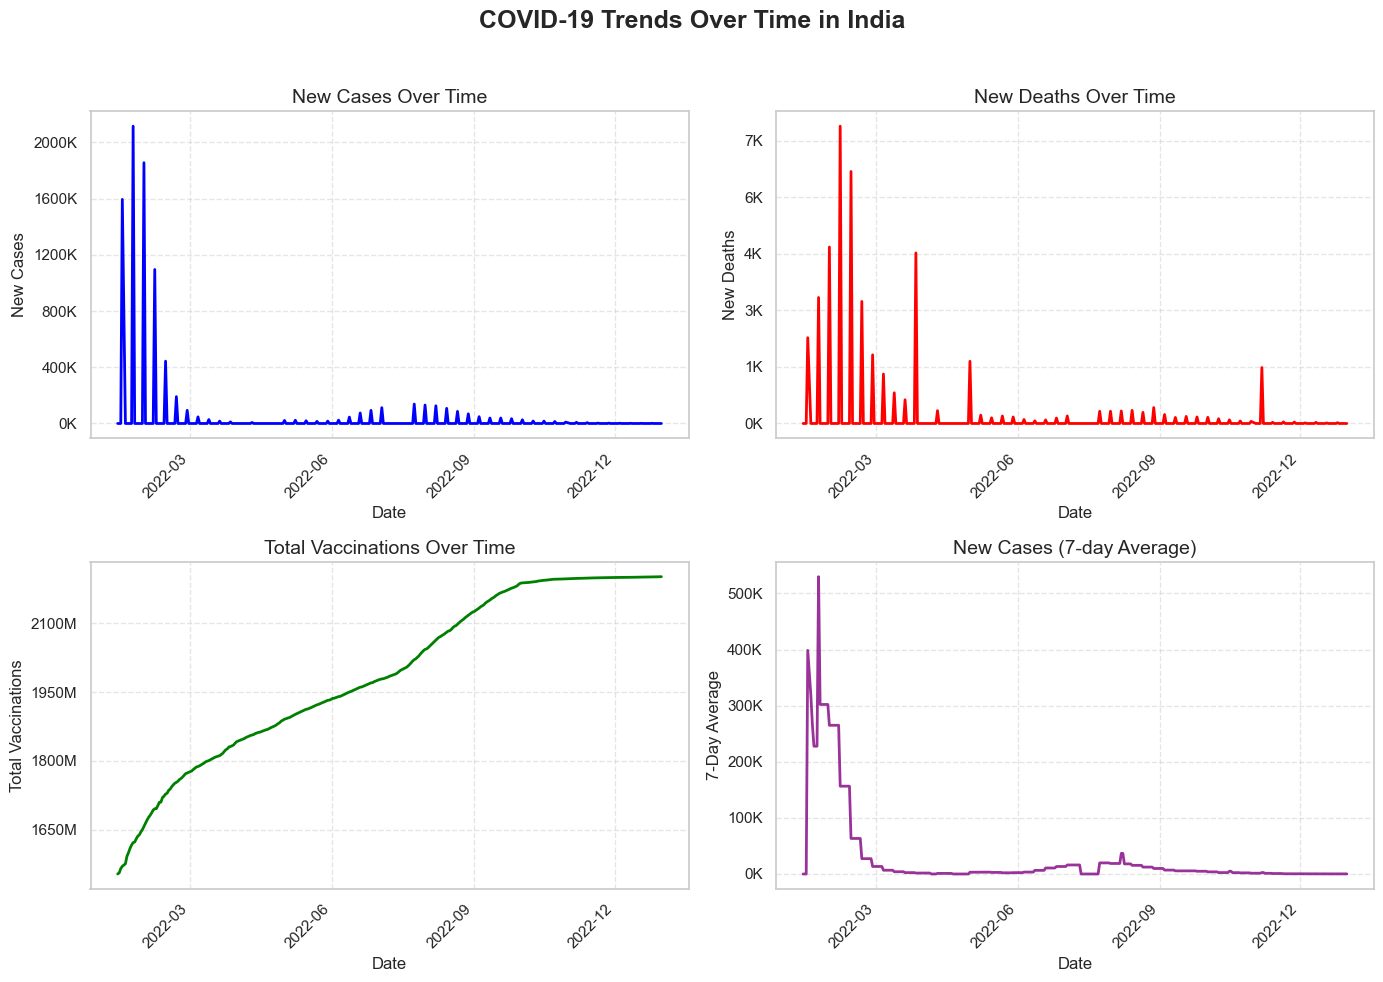

Total Deaths 8869980.0


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Ensure 'date' is datetime and set as index
if 'date' in india_df_covid.columns:
    india_df_covid['date'] = pd.to_datetime(india_df_covid['date'])
    india_df_covid.set_index('date', inplace=True)

# Compute 7-day average for new cases
india_df_covid['new_cases_7day_avg'] = india_df_covid['new_cases'].rolling(window=7, min_periods=1).mean()

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('COVID-19 Trends Over Time in India', fontsize=18, fontweight='bold')

# Formatter functions
thousands = FuncFormatter(lambda x, _: f'{int(x/1000)}K')
millions = FuncFormatter(lambda x, _: f'{int(x/1e6)}M')

# 1. New Cases
axs[0, 0].plot(india_df_covid.index, india_df_covid['new_cases'], color='blue', linewidth=2)
axs[0, 0].set_title('New Cases Over Time', fontsize=14)
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('New Cases')
axs[0, 0].grid(True, linestyle='--', alpha=0.5)
axs[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[0, 0].yaxis.set_major_formatter(thousands)

# 2. New Deaths
axs[0, 1].plot(india_df_covid.index, india_df_covid['new_deaths'], color='red', linewidth=2)
axs[0, 1].set_title('New Deaths Over Time', fontsize=14)
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('New Deaths')
axs[0, 1].grid(True, linestyle='--', alpha=0.5)
axs[0, 1].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[0, 1].yaxis.set_major_formatter(thousands)

# 3. Total Vaccinations
axs[1, 0].plot(india_df_covid.index, india_df_covid['total_vaccinations'], color='green', linewidth=2)
axs[1, 0].set_title('Total Vaccinations Over Time', fontsize=14)
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Total Vaccinations')
axs[1, 0].grid(True, linestyle='--', alpha=0.5)
axs[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[1, 0].yaxis.set_major_formatter(millions)

# 4. 7-Day Average of New Cases
axs[1, 1].plot(india_df_covid.index, india_df_covid['new_cases_7day_avg'],
               color='purple', linewidth=2, alpha=0.8)
axs[1, 1].set_title('New Cases (7-day Average)', fontsize=14)
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('7-Day Average')
axs[1, 1].grid(True, linestyle='--', alpha=0.5)
axs[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[1, 1].yaxis.set_major_formatter(thousands)

# Format x-axis on all subplots
for ax in axs.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# tao
total_deaths = india_df_covid['new_cases'].sum()
print("Total Deaths",total_deaths)

####  VACCINATION PROGRESSION IN INDIA

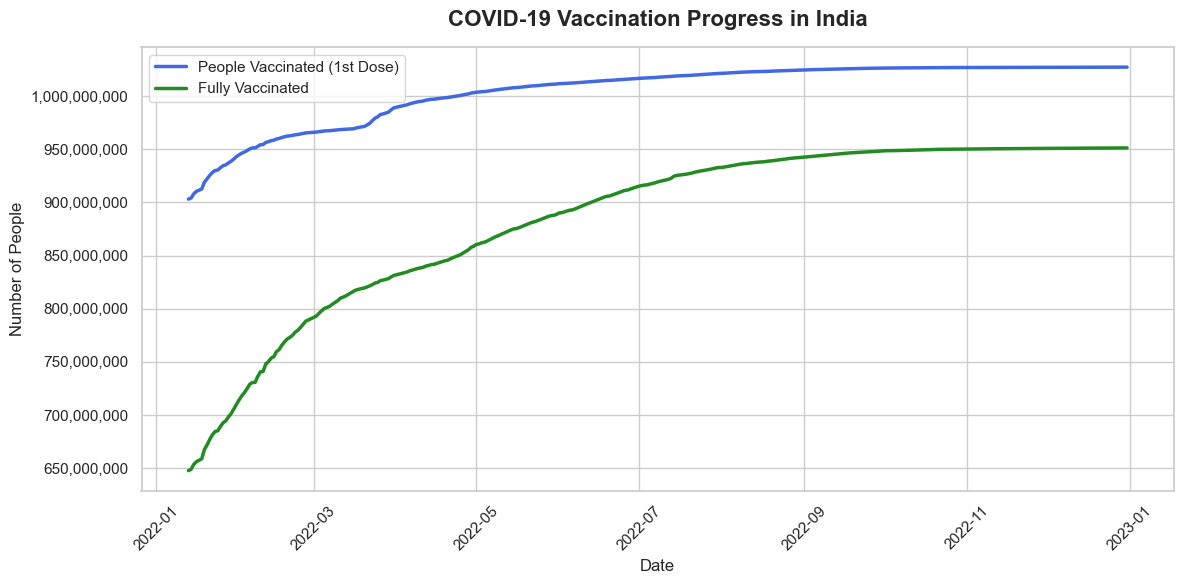

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Optional: Set a font that supports more glyphs
plt.rcParams['font.family'] = 'DejaVu Sans'

# Ensure 'date' column is correctly set
india_df_clean.rename(columns={'date_reported': 'date'}, inplace=True)  # Only if needed
india_df_clean['date'] = pd.to_datetime(india_df_clean['date'])

# Drop rows with missing values in vaccination columns
plot_df = india_df_clean.dropna(subset=['people_vaccinated', 'people_fully_vaccinated'])

# Plot styling
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot vaccination curves
plt.plot(plot_df['date'], plot_df['people_vaccinated'], label='People Vaccinated (1st Dose)', color='royalblue', linewidth=2.5)
plt.plot(plot_df['date'], plot_df['people_fully_vaccinated'], label='Fully Vaccinated', color='forestgreen', linewidth=2.5)

# Labels and title
plt.title('COVID-19 Vaccination Progress in India', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.xticks(rotation=45)

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Layout optimization
plt.tight_layout()

# Show plot
plt.show()


### COVID DATA COMPARISON FOR INDIA,USA AND GERMANY

Starting COVID-19 Data Analysis...
Comparing India, United States, and Germany
--------------------------------------------------
Loading COVID data...
Preparing and cleaning data...
Data shape after cleaning: (429435, 67)
Date range: 2020-01-01 00:00:00 to 2024-08-14 00:00:00
Countries available: 255 countries
Sample countries: ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina']
Filtering data for countries: ['India', 'United States', 'Germany']
✓ Found exact match for: India
✓ Found exact match for: United States
✓ Found exact match for: Germany
Successfully filtered data for: ['India', 'United States', 'Germany']
Filtered data shape: (5030, 67)

DEBUGGING COUNTRY DATA

--- DEBUGGING INDIA ---
Number of records: 1682
Date range: 2020-01-05 00:00:00 to 2024-08-12 00:00:00
Total deaths - Min: 0.0, Max: 533623.0
Total deaths - Non-zero values: 1604
Total deaths - NaN values: 0
Sample total_deaths values:


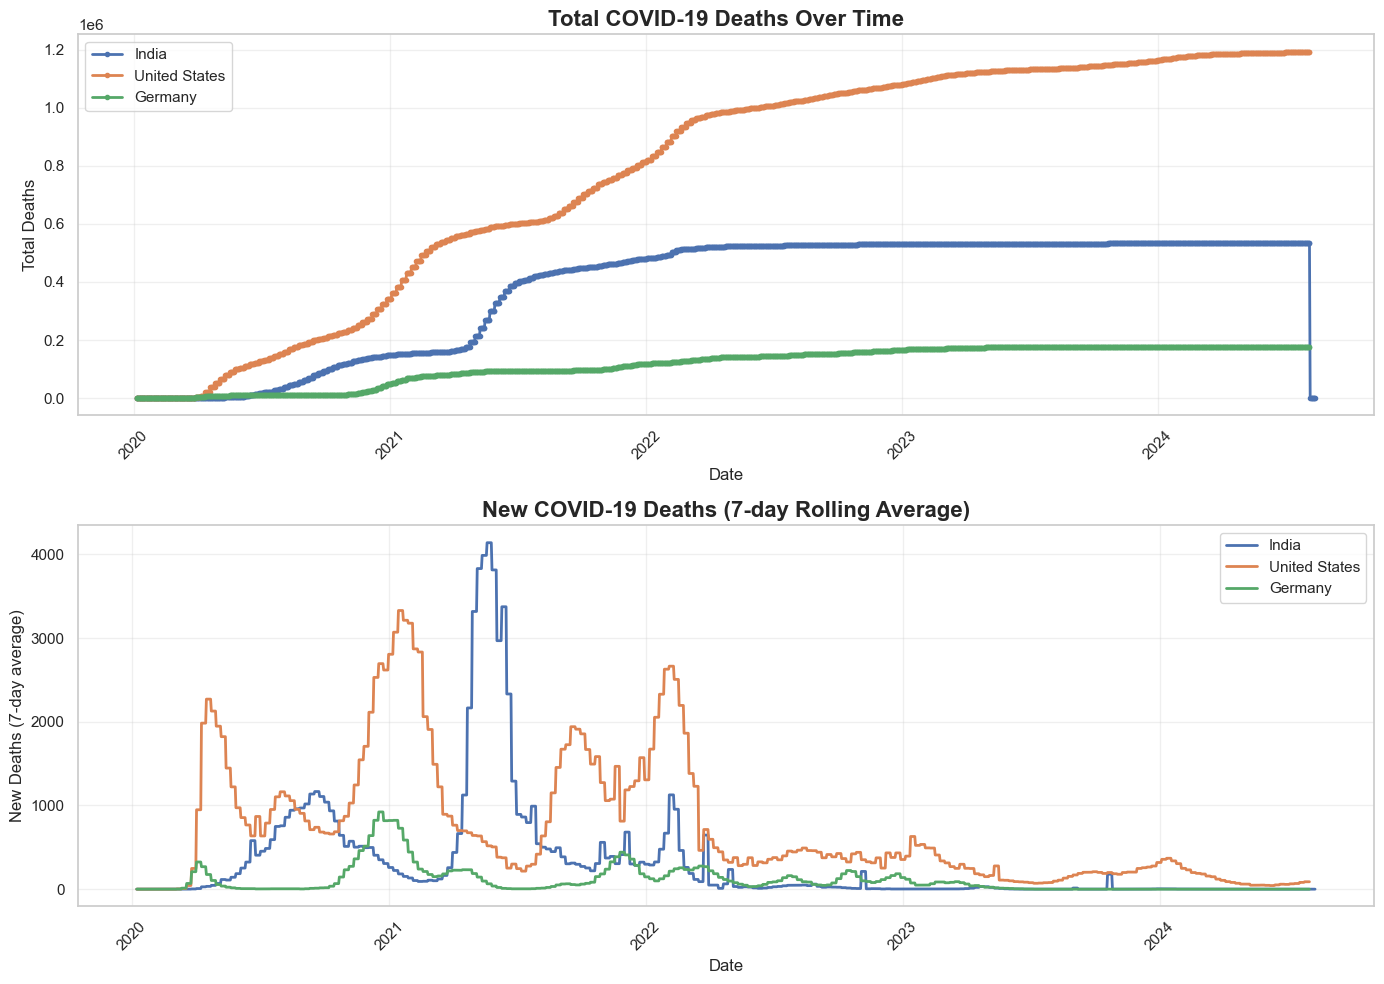


2. Creating vaccination progress analysis...


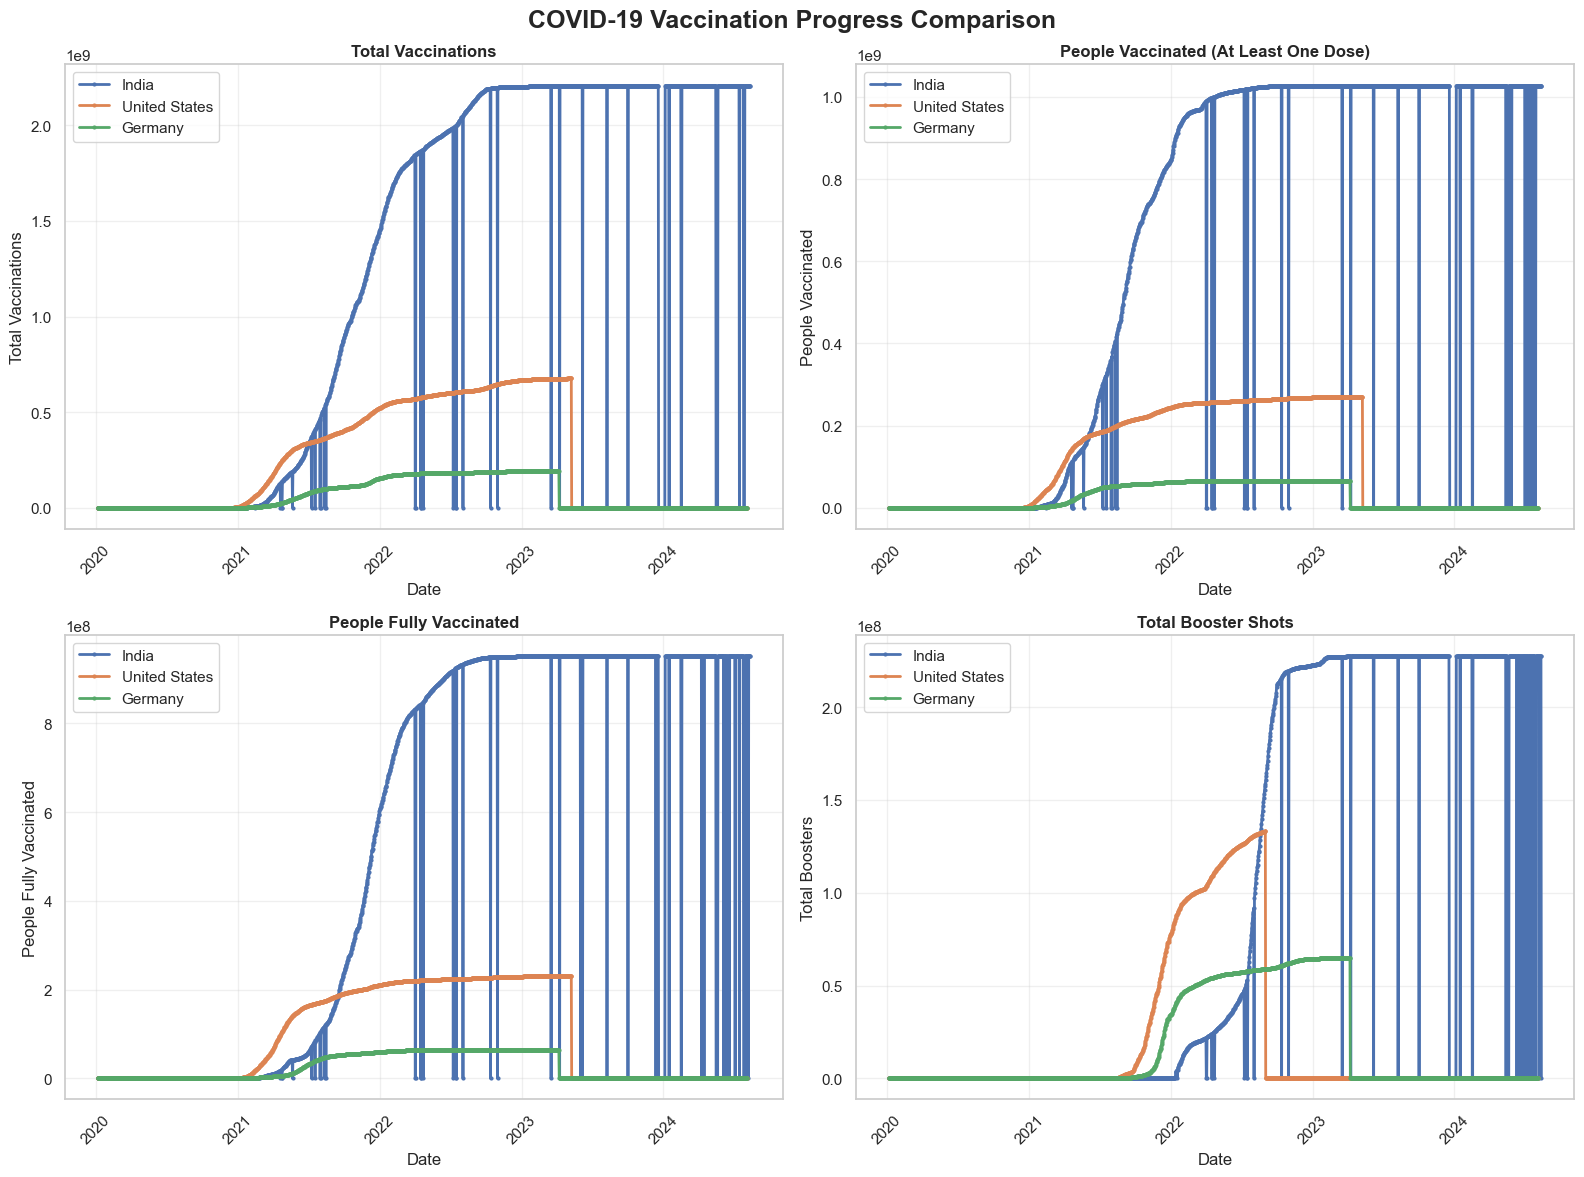


3. Creating comparative metrics...


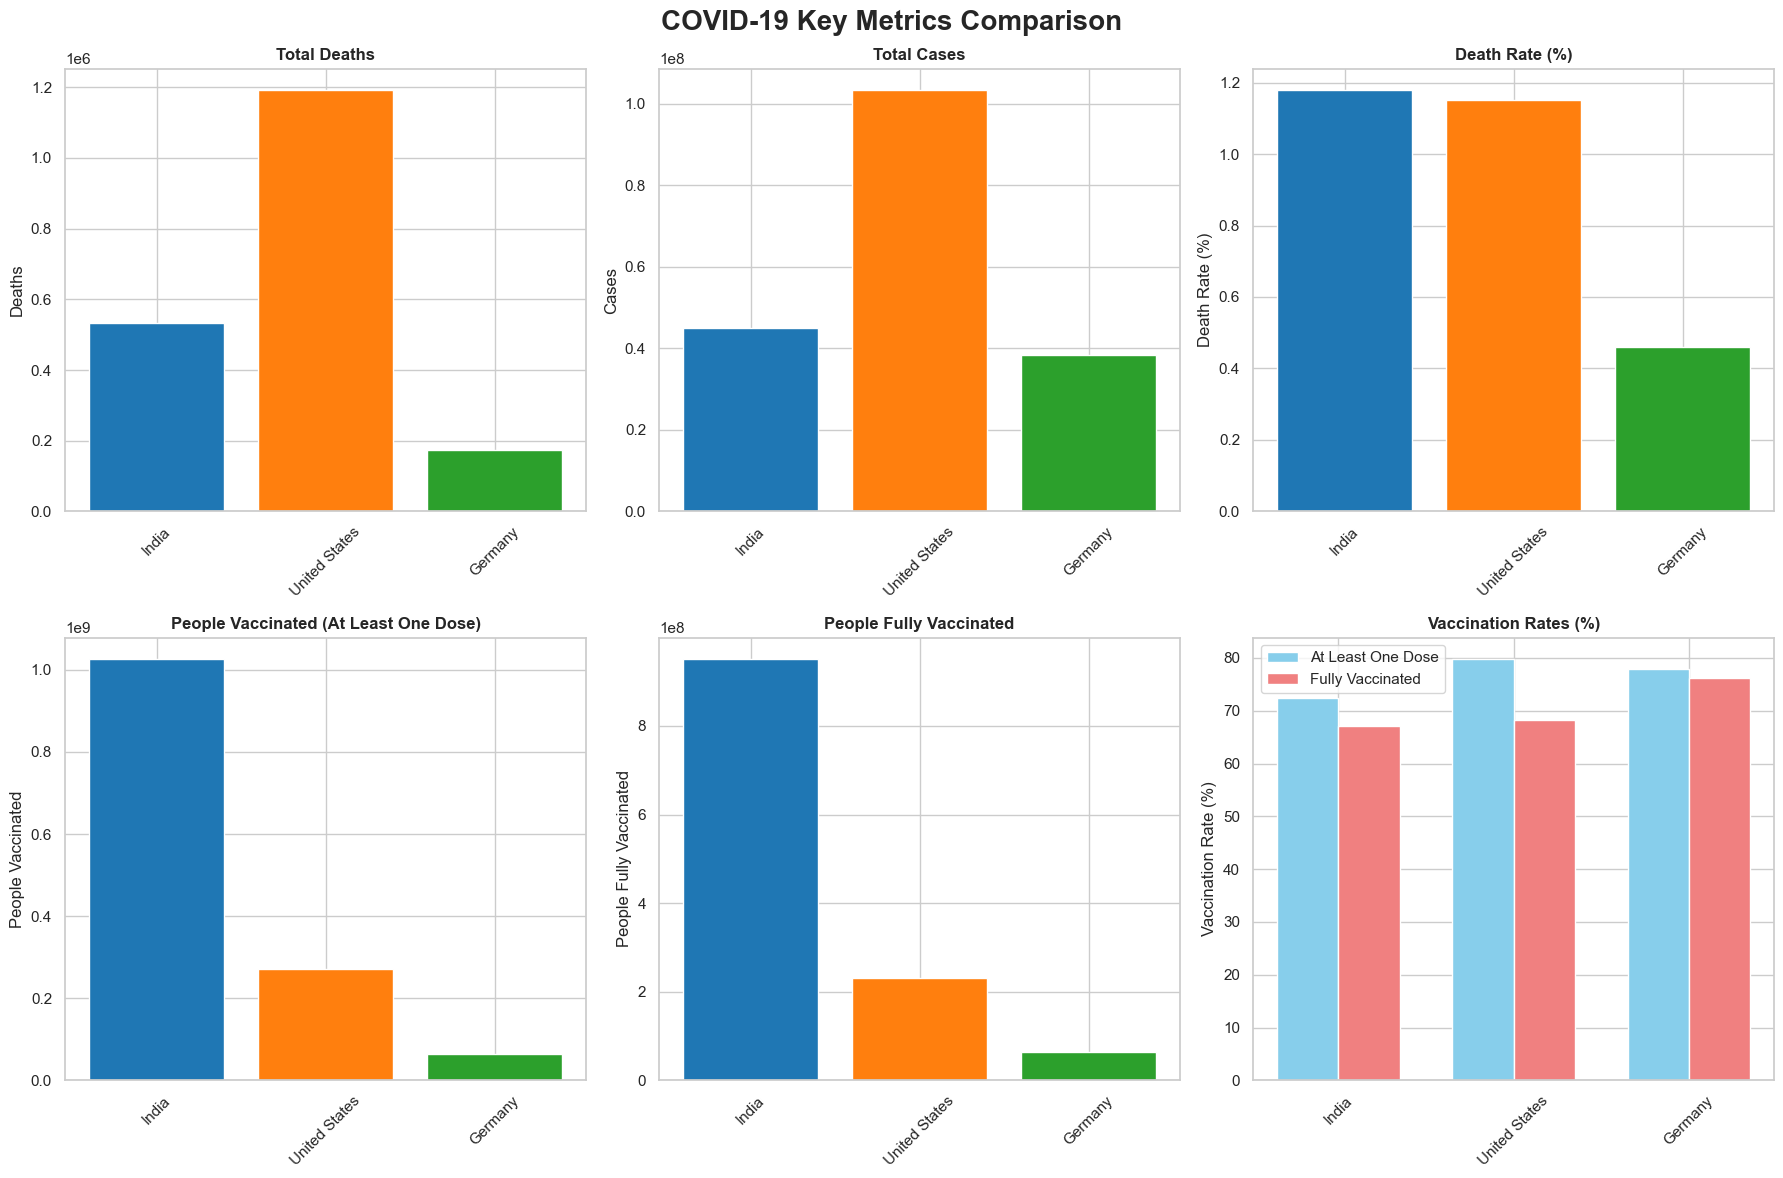


4. Creating cases vs deaths analysis...


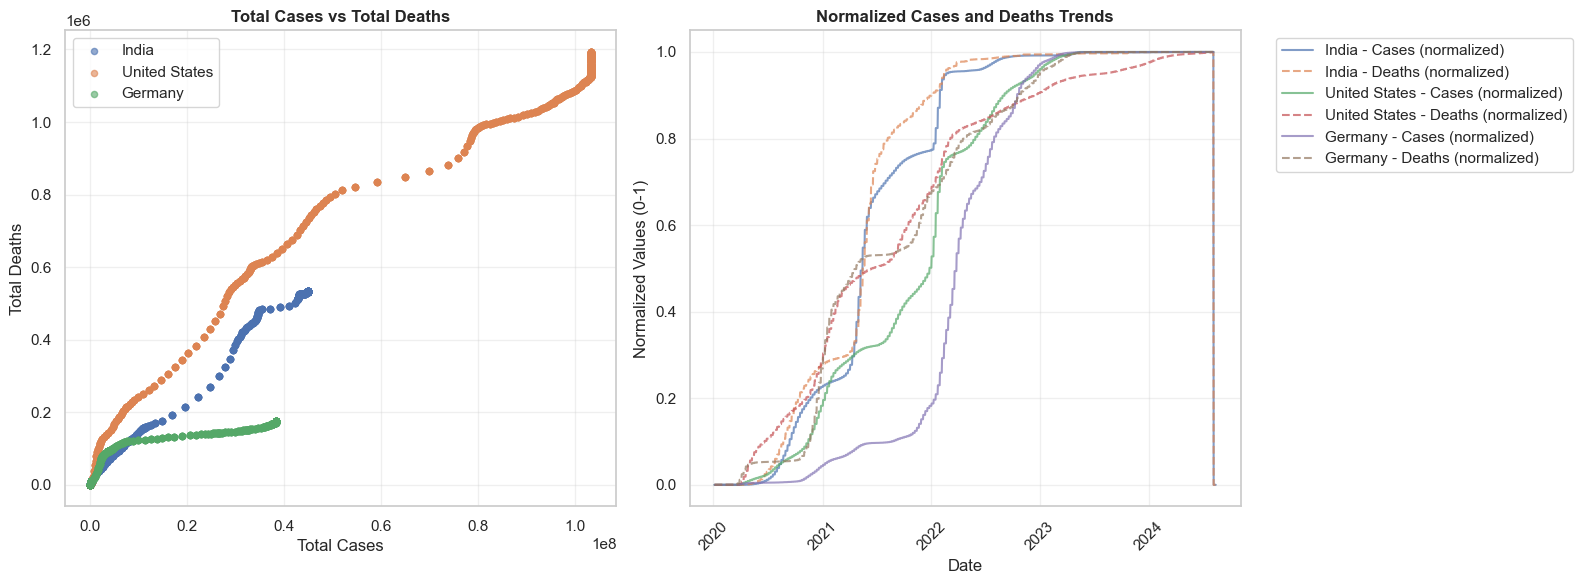


5. Generating detailed report...
COVID-19 COMPREHENSIVE ANALYSIS REPORT
Analysis Date: 2025-06-02 15:56:55
Countries Analyzed: India, United States, Germany
Data Period: 2020-01-05 to 2024-08-12


SUMMARY STATISTICS:
----------------------------------------
      Country Latest Date  Total Deaths  Total Cases  Total Vaccinations  People Vaccinated  People Fully Vaccinated  Total Boosters  Population  Death Rate (%)  Vaccination Rate (%)  Full Vaccination Rate (%)
        India  2024-08-12        533623     45041748          2206868000         1027438924                951990552       227438524  1417173120            1.18                 72.50                      67.18
United States  2024-08-04       1193165    103436829           676728782          270227181                230637348       133062763   338289856            1.15                 79.88                      68.18
      Germany  2024-08-04        174979     38437756           192221468           64876299                 635

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

class CovidDataAnalyzer:
    def __init__(self, csv_file_path='covid-data.csv'):
        """
        Initialize the COVID data analyzer

        Args:
            csv_file_path (str): Path to the CSV file containing COVID data
        """
        print("Loading COVID data...")
        self.df = pd.read_csv(csv_file_path)
        self.prepare_data()

    def prepare_data(self):
        """Clean and prepare the data for analysis"""
        print("Preparing and cleaning data...")

        # Convert date column to datetime
        self.df['date'] = pd.to_datetime(self.df['date'], errors='coerce')

        # Remove rows where date is NaN
        self.df = self.df.dropna(subset=['date'])

        # Clean location names
        self.df['location'] = self.df['location'].str.strip()

        # Remove rows where location is NaN
        self.df = self.df.dropna(subset=['location'])

        # Key columns for analysis
        self.key_columns = [
            'total_deaths', 'new_deaths', 'total_vaccinations',
            'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
            'total_cases', 'new_cases'
        ]

        # Fill NaN values with 0 for key numeric columns
        for col in self.key_columns:
            if col in self.df.columns:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce').fillna(0)

        # Sort by location and date
        self.df = self.df.sort_values(['location', 'date'])

        print(f"Data shape after cleaning: {self.df.shape}")
        print(f"Date range: {self.df['date'].min()} to {self.df['date'].max()}")
        print(f"Countries available: {len(self.df['location'].unique())} countries")
        print(f"Sample countries: {list(self.df['location'].unique()[:10])}")

    def filter_countries(self, countries=['India', 'United States', 'Germany']):
        """
        Filter data for specific countries

        Args:
            countries (list): List of countries to analyze
        """
        print(f"Filtering data for countries: {countries}")

        # Find exact matches first
        available_countries = list(self.df['location'].unique())
        matched_countries = []

        for country in countries:
            if country in available_countries:
                matched_countries.append(country)
                print(f"✓ Found exact match for: {country}")
            else:
                # Try to find similar names
                found = False
                for available in available_countries:
                    if country.lower() in available.lower() or available.lower() in country.lower():
                        matched_countries.append(available)
                        print(f"✓ Matched '{country}' to '{available}'")
                        found = True
                        break
                if not found:
                    print(f"✗ Could not find match for: {country}")

        if matched_countries:
            self.filtered_df = self.df[self.df['location'].isin(matched_countries)].copy()
            self.countries = matched_countries
            print(f"Successfully filtered data for: {matched_countries}")
            print(f"Filtered data shape: {self.filtered_df.shape}")

            # DEBUG: Check India's data specifically
            self.debug_country_data()

        else:
            print("No matching countries found!")
            print(f"Available countries include: {available_countries[:20]}")
            self.filtered_df = pd.DataFrame()
            self.countries = []

    def debug_country_data(self):
        """Debug function to check country-specific data issues"""
        print("\n" + "="*50)
        print("DEBUGGING COUNTRY DATA")
        print("="*50)

        for country in self.countries:
            print(f"\n--- DEBUGGING {country.upper()} ---")
            country_data = self.filtered_df[self.filtered_df['location'] == country]

            print(f"Number of records: {len(country_data)}")
            print(f"Date range: {country_data['date'].min()} to {country_data['date'].max()}")

            # Check total_deaths column
            total_deaths = country_data['total_deaths']
            print(f"Total deaths - Min: {total_deaths.min()}, Max: {total_deaths.max()}")
            print(f"Total deaths - Non-zero values: {(total_deaths > 0).sum()}")
            print(f"Total deaths - NaN values: {total_deaths.isna().sum()}")

            # Show sample of total_deaths data
            print("Sample total_deaths values:")
            sample_data = country_data[['date', 'total_deaths']].tail(10)
            print(sample_data.to_string(index=False))

            # Check if data exists but is all zeros
            if total_deaths.max() == 0:
                print(f"⚠️  WARNING: All total_deaths values are 0 for {country}")
                # Check new_deaths instead
                new_deaths = country_data['new_deaths']
                print(f"New deaths - Min: {new_deaths.min()}, Max: {new_deaths.max()}")
                if new_deaths.max() > 0:
                    print("✓ New deaths data exists - there might be a cumulative calculation issue")

            # Check other key columns
            for col in ['total_cases', 'new_deaths', 'total_vaccinations']:
                if col in country_data.columns:
                    col_data = country_data[col]
                    print(f"{col} - Min: {col_data.min()}, Max: {col_data.max()}, Non-zero: {(col_data > 0).sum()}")

            print("-" * 30)

    def plot_deaths_over_time(self):
        """Plot death trends over time"""
        if self.filtered_df.empty:
            print("No data to plot")
            return

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

        # Plot 1: Total Deaths
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            ax1.plot(country_data['date'], country_data['total_deaths'],
                    marker='o', linewidth=2, label=country, markersize=3)

        ax1.set_title('Total COVID-19 Deaths Over Time', fontsize=16, fontweight='bold')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Total Deaths')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.tick_params(axis='x', rotation=45)

        # Plot 2: New Deaths (7-day average)
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            # Calculate 7-day rolling average for smoother visualization
            country_data['new_deaths_7day'] = country_data['new_deaths'].rolling(window=7, center=True).mean()
            ax2.plot(country_data['date'], country_data['new_deaths_7day'],
                    linewidth=2, label=country)

        ax2.set_title('New COVID-19 Deaths (7-day Rolling Average)', fontsize=16, fontweight='bold')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('New Deaths (7-day average)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    def plot_vaccination_progress(self):
        """Plot vaccination progress over time"""
        if self.filtered_df.empty:
            return

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # Plot 1: Total Vaccinations
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            axes[0,0].plot(country_data['date'], country_data['total_vaccinations'],
                          marker='o', linewidth=2, label=country, markersize=2)

        axes[0,0].set_title('Total Vaccinations', fontweight='bold')
        axes[0,0].set_xlabel('Date')
        axes[0,0].set_ylabel('Total Vaccinations')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].tick_params(axis='x', rotation=45)

        # Plot 2: People Vaccinated (at least one dose)
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            axes[0,1].plot(country_data['date'], country_data['people_vaccinated'],
                          marker='o', linewidth=2, label=country, markersize=2)

        axes[0,1].set_title('People Vaccinated (At Least One Dose)', fontweight='bold')
        axes[0,1].set_xlabel('Date')
        axes[0,1].set_ylabel('People Vaccinated')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        axes[0,1].tick_params(axis='x', rotation=45)

        # Plot 3: People Fully Vaccinated
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            axes[1,0].plot(country_data['date'], country_data['people_fully_vaccinated'],
                          marker='o', linewidth=2, label=country, markersize=2)

        axes[1,0].set_title('People Fully Vaccinated', fontweight='bold')
        axes[1,0].set_xlabel('Date')
        axes[1,0].set_ylabel('People Fully Vaccinated')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].tick_params(axis='x', rotation=45)

        # Plot 4: Total Boosters
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            axes[1,1].plot(country_data['date'], country_data['total_boosters'],
                          marker='o', linewidth=2, label=country, markersize=2)

        axes[1,1].set_title('Total Booster Shots', fontweight='bold')
        axes[1,1].set_xlabel('Date')
        axes[1,1].set_ylabel('Total Boosters')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        axes[1,1].tick_params(axis='x', rotation=45)

        plt.suptitle('COVID-19 Vaccination Progress Comparison', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.show()

    def create_summary_statistics(self):
        """Create comprehensive summary statistics"""
        if self.filtered_df.empty:
            return pd.DataFrame()

        summary_data = []

        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]

            # Sort by date to get the most recent data
            country_data = country_data.sort_values('date')

            # Get the latest non-null data for each metric (sometimes latest date might have NaN)
            def get_latest_value(column):
                non_null_data = country_data[country_data[column].notna() & (country_data[column] > 0)]
                if not non_null_data.empty:
                    return non_null_data[column].iloc[-1]
                else:
                    return country_data[column].max() if not country_data[column].isna().all() else 0

            # Get latest date with data
            latest_date = country_data['date'].iloc[-1]

            row = {
                'Country': country,
                'Latest Date': latest_date.strftime('%Y-%m-%d'),
                'Total Deaths': int(get_latest_value('total_deaths')),
                'Total Cases': int(get_latest_value('total_cases')),
                'Total Vaccinations': int(get_latest_value('total_vaccinations')),
                'People Vaccinated': int(get_latest_value('people_vaccinated')),
                'People Fully Vaccinated': int(get_latest_value('people_fully_vaccinated')),
                'Total Boosters': int(get_latest_value('total_boosters')),
                'Population': int(country_data['population'].iloc[-1]) if pd.notna(country_data['population'].iloc[-1]) else 0
            }

            # Calculate death rate
            if row['Total Cases'] > 0:
                row['Death Rate (%)'] = round((row['Total Deaths'] / row['Total Cases']) * 100, 2)
            else:
                row['Death Rate (%)'] = 0

            # Calculate vaccination rates if population data is available
            if row['Population'] > 0:
                row['Vaccination Rate (%)'] = round((row['People Vaccinated'] / row['Population']) * 100, 2)
                row['Full Vaccination Rate (%)'] = round((row['People Fully Vaccinated'] / row['Population']) * 100, 2)
            else:
                row['Vaccination Rate (%)'] = 0
                row['Full Vaccination Rate (%)'] = 0

            # Debug output for zero deaths
            if row['Total Deaths'] == 0:
                print(f"\n⚠️  DEBUG: {country} showing 0 deaths")
                print(f"   Max total_deaths in data: {country_data['total_deaths'].max()}")
                print(f"   Sum of new_deaths: {country_data['new_deaths'].sum()}")
                print(f"   Non-zero total_deaths count: {(country_data['total_deaths'] > 0).sum()}")

            summary_data.append(row)

        summary_df = pd.DataFrame(summary_data)
        return summary_df

    def plot_comparative_metrics(self):
        """Create comparative bar charts for key metrics"""
        summary_df = self.create_summary_statistics()
        if summary_df.empty:
            return

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # Define colors for countries
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

        # Plot 1: Total Deaths
        axes[0,0].bar(summary_df['Country'], summary_df['Total Deaths'], color=colors[:len(summary_df)])
        axes[0,0].set_title('Total Deaths', fontweight='bold')
        axes[0,0].set_ylabel('Deaths')
        axes[0,0].tick_params(axis='x', rotation=45)

        # Plot 2: Total Cases
        axes[0,1].bar(summary_df['Country'], summary_df['Total Cases'], color=colors[:len(summary_df)])
        axes[0,1].set_title('Total Cases', fontweight='bold')
        axes[0,1].set_ylabel('Cases')
        axes[0,1].tick_params(axis='x', rotation=45)

        # Plot 3: Death Rate
        axes[0,2].bar(summary_df['Country'], summary_df['Death Rate (%)'], color=colors[:len(summary_df)])
        axes[0,2].set_title('Death Rate (%)', fontweight='bold')
        axes[0,2].set_ylabel('Death Rate (%)')
        axes[0,2].tick_params(axis='x', rotation=45)

        # Plot 4: People Vaccinated
        axes[1,0].bar(summary_df['Country'], summary_df['People Vaccinated'], color=colors[:len(summary_df)])
        axes[1,0].set_title('People Vaccinated (At Least One Dose)', fontweight='bold')
        axes[1,0].set_ylabel('People Vaccinated')
        axes[1,0].tick_params(axis='x', rotation=45)

        # Plot 5: People Fully Vaccinated
        axes[1,1].bar(summary_df['Country'], summary_df['People Fully Vaccinated'], color=colors[:len(summary_df)])
        axes[1,1].set_title('People Fully Vaccinated', fontweight='bold')
        axes[1,1].set_ylabel('People Fully Vaccinated')
        axes[1,1].tick_params(axis='x', rotation=45)

        # Plot 6: Vaccination Rates
        x = np.arange(len(summary_df))
        width = 0.35

        axes[1,2].bar(x - width/2, summary_df['Vaccination Rate (%)'], width,
                     label='At Least One Dose', color='skyblue')
        axes[1,2].bar(x + width/2, summary_df['Full Vaccination Rate (%)'], width,
                     label='Fully Vaccinated', color='lightcoral')

        axes[1,2].set_title('Vaccination Rates (%)', fontweight='bold')
        axes[1,2].set_ylabel('Vaccination Rate (%)')
        axes[1,2].set_xticks(x)
        axes[1,2].set_xticklabels(summary_df['Country'], rotation=45)
        axes[1,2].legend()

        plt.suptitle('COVID-19 Key Metrics Comparison', fontsize=20, fontweight='bold')
        plt.tight_layout()
        plt.show()

        return summary_df

    def plot_cases_vs_deaths(self):
        """Plot cases vs deaths correlation"""
        if self.filtered_df.empty:
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Plot 1: Total Cases vs Total Deaths
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            ax1.scatter(country_data['total_cases'], country_data['total_deaths'],
                       label=country, alpha=0.6, s=20)

        ax1.set_title('Total Cases vs Total Deaths', fontweight='bold')
        ax1.set_xlabel('Total Cases')
        ax1.set_ylabel('Total Deaths')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Cases and Deaths over time (normalized)
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            # Normalize to show trends better
            max_cases = country_data['total_cases'].max()
            max_deaths = country_data['total_deaths'].max()
            if max_cases > 0 and max_deaths > 0:
                ax2.plot(country_data['date'], country_data['total_cases']/max_cases,
                        label=f'{country} - Cases (normalized)', linestyle='-', alpha=0.7)
                ax2.plot(country_data['date'], country_data['total_deaths']/max_deaths,
                        label=f'{country} - Deaths (normalized)', linestyle='--', alpha=0.7)

        ax2.set_title('Normalized Cases and Deaths Trends', fontweight='bold')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Normalized Values (0-1)')
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    def generate_detailed_report(self):
        """Generate a comprehensive analysis report"""
        if self.filtered_df.empty:
            print("No data available for analysis")
            return

        print("="*60)
        print("COVID-19 COMPREHENSIVE ANALYSIS REPORT")
        print("="*60)
        print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Countries Analyzed: {', '.join(self.countries)}")
        print(f"Data Period: {self.filtered_df['date'].min().strftime('%Y-%m-%d')} to {self.filtered_df['date'].max().strftime('%Y-%m-%d')}")
        print("\n")

        # Summary Statistics
        summary_df = self.create_summary_statistics()
        print("SUMMARY STATISTICS:")
        print("-" * 40)
        print(summary_df.to_string(index=False))
        print("\n")

        # Peak Analysis
        print("PEAK ANALYSIS:")
        print("-" * 40)
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]

            # Find peak new deaths
            max_deaths_idx = country_data['new_deaths'].idxmax()
            peak_deaths_date = country_data.loc[max_deaths_idx, 'date']
            peak_deaths_value = country_data.loc[max_deaths_idx, 'new_deaths']

            # Find peak new cases
            max_cases_idx = country_data['new_cases'].idxmax()
            peak_cases_date = country_data.loc[max_cases_idx, 'date']
            peak_cases_value = country_data.loc[max_cases_idx, 'new_cases']

            print(f"{country}:")
            print(f"  Peak Daily Deaths: {int(peak_deaths_value)} on {peak_deaths_date.strftime('%Y-%m-%d')}")
            print(f"  Peak Daily Cases: {int(peak_cases_value)} on {peak_cases_date.strftime('%Y-%m-%d')}")
            print()

        return summary_df

# Main execution function
def run_covid_analysis(countries=['India', 'United States', 'Germany']):
    """
    Run complete COVID-19 analysis

    Args:
        countries (list): List of countries to compare (default: India, USA, Germany)
    """
    try:
        # Initialize analyzer
        analyzer = CovidDataAnalyzer('covid-data.csv')

        # Filter for specified countries
        analyzer.filter_countries(countries)

        if analyzer.filtered_df.empty:
            print("No data found for the specified countries. Please check country names.")
            return None

        # Generate all visualizations and analysis
        print("\n1. Creating death trend analysis...")
        analyzer.plot_deaths_over_time()

        print("\n2. Creating vaccination progress analysis...")
        analyzer.plot_vaccination_progress()

        print("\n3. Creating comparative metrics...")
        summary = analyzer.plot_comparative_metrics()

        print("\n4. Creating cases vs deaths analysis...")
        analyzer.plot_cases_vs_deaths()

        print("\n5. Generating detailed report...")
        analyzer.generate_detailed_report()

        return analyzer, summary

    except FileNotFoundError:
        print("Error: 'covid-data.csv' file not found in the current directory.")
        print("Please make sure the file exists and try again.")
        return None

    except Exception as e:
        print(f"An error occurred during analysis: {e}")
        return None

# Execute the analysis
if __name__ == "__main__":
    print("Starting COVID-19 Data Analysis...")
    print("Comparing India, United States, and Germany")
    print("-" * 50)

    # Run the analysis
    result = run_covid_analysis(['India', 'United States', 'Germany'])

    if result:
        analyzer, summary = result
        print("\nAnalysis completed successfully!")
        print("All visualizations have been generated.")
    else:
        print("\nAnalysis failed. Please check the error messages above.")

# Additional utility functions
def compare_custom_countries(country_list):
    """
    Compare custom list of countries

    Args:
        country_list (list): List of country names to compare
    """
    return run_covid_analysis(country_list)

def get_available_countries():
    """
    Get list of all available countries in the dataset
    """
    try:
        df = pd.read_csv('covid-data.csv')
        countries = sorted(df['location'].unique())
        print("Available countries in the dataset:")
        for i, country in enumerate(countries, 1):
            print(f"{i:3d}. {country}")
        return countries
    except FileNotFoundError:
        print("Error: 'covid-data.csv' file not found.")
        return []

# Additional debugging functions
def quick_debug_india():
    """
    Quick function to debug India's data specifically
    """
    try:
        df = pd.read_csv('covid-data.csv')
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

        # Check what India entries exist
        india_entries = df[df['location'].str.contains('India', case=False, na=False)]['location'].unique()
        print("India-related entries found:")
        for entry in india_entries:
            print(f"  - {entry}")

        # Get India data
        india_data = df[df['location'] == 'India'].copy()

        if india_data.empty:
            print("No data found for 'India'. Trying case-insensitive search...")
            india_data = df[df['location'].str.lower() == 'india'].copy()

        if not india_data.empty:
            print(f"\nIndia data found: {len(india_data)} records")
            print(f"Date range: {india_data['date'].min()} to {india_data['date'].max()}")

            # Check deaths data
            print(f"\nDeath statistics:")
            print(f"total_deaths - Min: {india_data['total_deaths'].min()}, Max: {india_data['total_deaths'].max()}")
            print(f"new_deaths - Min: {india_data['new_deaths'].min()}, Max: {india_data['new_deaths'].max()}")
            print(f"Non-zero total_deaths: {(india_data['total_deaths'] > 0).sum()} out of {len(india_data)}")

            # Show recent data
            print(f"\nLast 10 records:")
            recent_data = india_data[['date', 'total_deaths', 'new_deaths', 'total_cases']].tail(10)
            print(recent_data.to_string(index=False))

            # Check for data type issues
            print(f"\nData types:")
            print(f"total_deaths type: {india_data['total_deaths'].dtype}")
            print(f"Sample total_deaths values: {india_data['total_deaths'].head().tolist()}")

        else:
            print("No India data found at all!")
            print("Available countries sample:")
            print(df['location'].unique()[:20])

    except Exception as e:
        print(f"Error in debugging: {e}")

def check_data_integrity():
    """
    Check overall data integrity
    """
    try:
        df = pd.read_csv('covid-data.csv')
        print("="*50)
        print("DATA INTEGRITY CHECK")
        print("="*50)

        print(f"Total records: {len(df)}")
        print(f"Unique countries: {df['location'].nunique()}")
        print(f"Date range: {df['date'].min()} to {df['date'].max()}")

        # Check for countries with zero deaths
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df['total_deaths'] = pd.to_numeric(df['total_deaths'], errors='coerce').fillna(0)

        latest_data = df.groupby('location')['total_deaths'].max()
        zero_death_countries = latest_data[latest_data == 0].index.tolist()

        print(f"\nCountries with zero total deaths: {len(zero_death_countries)}")
        if 'India' in zero_death_countries:
            print("⚠️  India is in the zero deaths list!")

        # Show some countries with highest deaths for comparison
        print(f"\nTop 10 countries by total deaths:")
        top_deaths = latest_data.nlargest(10)
        print(top_deaths.to_string())

        return df

    except Exception as e:
        print(f"Error in data integrity check: {e}")
        return None

### COVID DATA COMPARISON WITH ADDED DETAILS

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import io
import base64
warnings.filterwarnings('ignore')

# Set enhanced styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class EnhancedCovidDataAnalyzer:
    def __init__(self, csv_file_path='covid-data.csv'):
        """
        Initialize the Enhanced COVID data analyzer with advanced features

        Args:
            csv_file_path (str): Path to the CSV file containing COVID data
        """
        print("🚀 Loading COVID data with enhanced analyzer...")
        self.df = pd.read_csv(csv_file_path)
        self.prepare_data()
        self.color_palette = px.colors.qualitative.Set3

    def prepare_data(self):
        """Clean and prepare the data with advanced preprocessing"""
        print("🔧 Preparing and cleaning data with advanced preprocessing...")

        # Convert date column to datetime
        self.df['date'] = pd.to_datetime(self.df['date'], errors='coerce')

        # Remove rows where date is NaN
        self.df = self.df.dropna(subset=['date'])

        # Clean location names
        self.df['location'] = self.df['location'].str.strip()
        self.df = self.df.dropna(subset=['location'])

        # Enhanced key columns for analysis
        self.key_columns = [
            'total_deaths', 'new_deaths', 'total_vaccinations',
            'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
            'total_cases', 'new_cases', 'icu_patients', 'hosp_patients',
            'reproduction_rate', 'stringency_index', 'population',
            'gdp_per_capita', 'human_development_index'
        ]

        # Fill NaN values with 0 for key numeric columns
        for col in self.key_columns:
            if col in self.df.columns:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce').fillna(0)

        # Calculate additional metrics
        self.df['death_rate'] = np.where(self.df['total_cases'] > 0,
                                        (self.df['total_deaths'] / self.df['total_cases']) * 100, 0)
        self.df['case_fatality_rate'] = self.df['death_rate']

        # Calculate vaccination rates if population data exists
        self.df['vaccination_rate'] = np.where(self.df['population'] > 0,
                                              (self.df['people_vaccinated'] / self.df['population']) * 100, 0)
        self.df['full_vaccination_rate'] = np.where(self.df['population'] > 0,
                                                   (self.df['people_fully_vaccinated'] / self.df['population']) * 100, 0)

        # Calculate 7-day rolling averages
        for country in self.df['location'].unique():
            mask = self.df['location'] == country
            self.df.loc[mask, 'new_cases_7day'] = self.df.loc[mask, 'new_cases'].rolling(window=7, center=True).mean()
            self.df.loc[mask, 'new_deaths_7day'] = self.df.loc[mask, 'new_deaths'].rolling(window=7, center=True).mean()

        # Sort by location and date
        self.df = self.df.sort_values(['location', 'date'])

        print(f"✅ Data shape after enhanced cleaning: {self.df.shape}")
        print(f"📅 Date range: {self.df['date'].min()} to {self.df['date'].max()}")
        print(f"🌍 Countries available: {len(self.df['location'].unique())} countries")
        print(f"🔍 Sample countries: {list(self.df['location'].unique()[:10])}")

    def filter_countries(self, countries=['India', 'United States', 'Germany']):
        """Enhanced country filtering with fuzzy matching"""
        print(f"🎯 Filtering data for countries: {countries}")

        available_countries = list(self.df['location'].unique())
        matched_countries = []

        for country in countries:
            if country in available_countries:
                matched_countries.append(country)
                print(f"✅ Found exact match for: {country}")
            else:
                found = False
                for available in available_countries:
                    if country.lower() in available.lower() or available.lower() in country.lower():
                        matched_countries.append(available)
                        print(f"🔄 Matched '{country}' to '{available}'")
                        found = True
                        break
                if not found:
                    print(f"❌ Could not find match for: {country}")

        if matched_countries:
            self.filtered_df = self.df[self.df['location'].isin(matched_countries)].copy()
            self.countries = matched_countries
            print(f"🎉 Successfully filtered data for: {matched_countries}")
            print(f"📊 Filtered data shape: {self.filtered_df.shape}")
        else:
            print("⚠️ No matching countries found!")
            self.filtered_df = pd.DataFrame()
            self.countries = []

    def create_interactive_deaths_plot(self):
        """Create interactive death trends visualization"""
        if self.filtered_df.empty:
            print("❌ No data to plot")
            return None

        fig = make_subplots(
            rows=2, cols=1,
            subplot_titles=['Total COVID-19 Deaths Over Time', 'New COVID-19 Deaths (7-day Rolling Average)'],
            vertical_spacing=0.08
        )

        # Plot total deaths
        for i, country in enumerate(self.countries):
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            fig.add_trace(
                go.Scatter(
                    x=country_data['date'],
                    y=country_data['total_deaths'],
                    mode='lines+markers',
                    name=f'{country} - Total Deaths',
                    line=dict(color=self.color_palette[i % len(self.color_palette)], width=3),
                    marker=dict(size=4),
                    hovertemplate=f'<b>{country}</b><br>Date: %{{x}}<br>Total Deaths: %{{y:,.0f}}<extra></extra>'
                ),
                row=1, col=1
            )

        # Plot new deaths (7-day average)
        for i, country in enumerate(self.countries):
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            fig.add_trace(
                go.Scatter(
                    x=country_data['date'],
                    y=country_data['new_deaths_7day'],
                    mode='lines',
                    name=f'{country} - New Deaths (7-day avg)',
                    line=dict(color=self.color_palette[i % len(self.color_palette)], width=2, dash='dot'),
                    hovertemplate=f'<b>{country}</b><br>Date: %{{x}}<br>New Deaths (7-day avg): %{{y:.1f}}<extra></extra>'
                ),
                row=2, col=1
            )

        fig.update_layout(
            height=800,
            title_text="📈 Interactive COVID-19 Death Analysis",
            title_x=0.5,
            title_font_size=20,
            showlegend=True,
            hovermode='x unified',
            template='plotly_white'
        )

        fig.update_xaxes(title_text="Date", row=2, col=1)
        fig.update_yaxes(title_text="Total Deaths", row=1, col=1)
        fig.update_yaxes(title_text="New Deaths (7-day avg)", row=2, col=1)

        fig.show()
        return fig

    def create_interactive_vaccination_dashboard(self):
        """Create comprehensive interactive vaccination dashboard"""
        if self.filtered_df.empty:
            return None

        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=[
                'Total Vaccinations Progress',
                'People Vaccinated (At Least One Dose)',
                'People Fully Vaccinated',
                'Vaccination Rate Comparison'
            ],
            specs=[[{"secondary_y": False}, {"secondary_y": False}],
                   [{"secondary_y": False}, {"type": "bar"}]]
        )

        # Plot 1: Total Vaccinations
        for i, country in enumerate(self.countries):
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            fig.add_trace(
                go.Scatter(
                    x=country_data['date'],
                    y=country_data['total_vaccinations'],
                    mode='lines+markers',
                    name=f'{country}',
                    line=dict(color=self.color_palette[i % len(self.color_palette)], width=2),
                    marker=dict(size=3),
                    hovertemplate=f'<b>{country}</b><br>Date: %{{x}}<br>Total Vaccinations: %{{y:,.0f}}<extra></extra>'
                ),
                row=1, col=1
            )

        # Plot 2: People Vaccinated
        for i, country in enumerate(self.countries):
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            fig.add_trace(
                go.Scatter(
                    x=country_data['date'],
                    y=country_data['people_vaccinated'],
                    mode='lines+markers',
                    name=f'{country}',
                    line=dict(color=self.color_palette[i % len(self.color_palette)], width=2),
                    marker=dict(size=3),
                    showlegend=False,
                    hovertemplate=f'<b>{country}</b><br>Date: %{{x}}<br>People Vaccinated: %{{y:,.0f}}<extra></extra>'
                ),
                row=1, col=2
            )

        # Plot 3: Fully Vaccinated
        for i, country in enumerate(self.countries):
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            fig.add_trace(
                go.Scatter(
                    x=country_data['date'],
                    y=country_data['people_fully_vaccinated'],
                    mode='lines+markers',
                    name=f'{country}',
                    line=dict(color=self.color_palette[i % len(self.color_palette)], width=2),
                    marker=dict(size=3),
                    showlegend=False,
                    hovertemplate=f'<b>{country}</b><br>Date: %{{x}}<br>Fully Vaccinated: %{{y:,.0f}}<extra></extra>'
                ),
                row=2, col=1
            )

        # Plot 4: Vaccination Rates Bar Chart
        latest_data = []
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            latest = country_data.iloc[-1]
            latest_data.append({
                'Country': country,
                'Vaccination Rate': latest['vaccination_rate'],
                'Full Vaccination Rate': latest['full_vaccination_rate']
            })

        rates_df = pd.DataFrame(latest_data)

        fig.add_trace(
            go.Bar(
                x=rates_df['Country'],
                y=rates_df['Vaccination Rate'],
                name='At Least One Dose',
                marker_color='lightblue',
                hovertemplate='<b>%{x}</b><br>Vaccination Rate: %{y:.1f}%<extra></extra>'
            ),
            row=2, col=2
        )

        fig.add_trace(
            go.Bar(
                x=rates_df['Country'],
                y=rates_df['Full Vaccination Rate'],
                name='Fully Vaccinated',
                marker_color='coral',
                hovertemplate='<b>%{x}</b><br>Full Vaccination Rate: %{y:.1f}%<extra></extra>'
            ),
            row=2, col=2
        )

        fig.update_layout(
            height=800,
            title_text="💉 Interactive COVID-19 Vaccination Dashboard",
            title_x=0.5,
            title_font_size=20,
            showlegend=True,
            template='plotly_white'
        )

        fig.show()
        return fig

    def create_advanced_comparative_analysis(self):
        """Create advanced comparative analysis with clustering"""
        if self.filtered_df.empty:
            return None

        # Get latest data for each country
        latest_data = []
        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country].iloc[-1]
            latest_data.append({
                'Country': country,
                'Total Deaths': country_data['total_deaths'],
                'Total Cases': country_data['total_cases'],
                'Death Rate': country_data['death_rate'],
                'Vaccination Rate': country_data['vaccination_rate'],
                'Population': country_data['population'],
                'GDP per Capita': country_data['gdp_per_capita'],
                'HDI': country_data['human_development_index']
            })

        df_analysis = pd.DataFrame(latest_data)

        # Create radar chart for comprehensive comparison
        fig = go.Figure()

        metrics = ['Death Rate', 'Vaccination Rate', 'GDP per Capita', 'HDI']

        for i, country in enumerate(self.countries):
            country_data = df_analysis[df_analysis['Country'] == country].iloc[0]

            # Normalize values for radar chart (0-100 scale)
            values = []
            for metric in metrics:
                if metric == 'Death Rate':
                    # Invert death rate (lower is better)
                    max_val = df_analysis[metric].max()
                    values.append(100 - (country_data[metric] / max_val * 100) if max_val > 0 else 0)
                else:
                    max_val = df_analysis[metric].max()
                    values.append((country_data[metric] / max_val * 100) if max_val > 0 else 0)

            fig.add_trace(go.Scatterpolar(
                r=values + [values[0]],  # Close the shape
                theta=metrics + [metrics[0]],
                fill='toself',
                name=country,
                line_color=self.color_palette[i % len(self.color_palette)]
            ))

        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, 100]
                )),
            showlegend=True,
            title="🎯 Advanced Country Performance Radar",
            title_x=0.5,
            title_font_size=18
        )

        fig.show()
        return fig

    def create_correlation_heatmap(self):
        """Create correlation analysis heatmap"""
        if self.filtered_df.empty:
            return None

        # Select numeric columns for correlation
        numeric_cols = ['total_deaths', 'total_cases', 'death_rate', 'vaccination_rate',
                       'full_vaccination_rate', 'gdp_per_capita', 'human_development_index',
                       'stringency_index', 'reproduction_rate']

        # Get latest data for correlation
        latest_df = self.filtered_df.groupby('location').last().reset_index()
        corr_data = latest_df[numeric_cols].corr()

        fig = go.Figure(data=go.Heatmap(
            z=corr_data.values,
            x=corr_data.columns,
            y=corr_data.columns,
            colorscale='RdBu',
            zmid=0,
            text=np.around(corr_data.values, decimals=2),
            texttemplate="%{text}",
            textfont={"size": 10},
            hovertemplate='<b>%{y} vs %{x}</b><br>Correlation: %{z:.3f}<extra></extra>'
        ))

        fig.update_layout(
            title="🔗 COVID Metrics Correlation Analysis",
            title_x=0.5,
            title_font_size=18,
            width=800,
            height=600
        )

        fig.show()
        return fig

    def create_predictive_trends(self):
        """Create predictive trend analysis"""
        if self.filtered_df.empty:
            return None

        fig = make_subplots(
            rows=len(self.countries), cols=1,
            subplot_titles=[f'{country} - Trend Analysis with Prediction' for country in self.countries],
            vertical_spacing=0.05
        )

        for i, country in enumerate(self.countries):
            country_data = self.filtered_df[self.filtered_df['location'] == country].copy()
            country_data = country_data.sort_values('date')

            # Prepare data for linear regression
            country_data['days'] = (country_data['date'] - country_data['date'].min()).dt.days

            # Fit linear regression for new cases trend
            valid_data = country_data.dropna(subset=['new_cases_7day'])
            if len(valid_data) > 10:
                slope, intercept, r_value, p_value, std_err = stats.linregress(
                    valid_data['days'], valid_data['new_cases_7day']
                )

                # Create prediction for next 30 days
                last_day = valid_data['days'].max()
                future_days = np.arange(last_day + 1, last_day + 31)
                future_predictions = slope * future_days + intercept
                future_dates = [valid_data['date'].max() + timedelta(days=d - last_day) for d in future_days]

                # Plot actual data
                fig.add_trace(
                    go.Scatter(
                        x=country_data['date'],
                        y=country_data['new_cases_7day'],
                        mode='lines',
                        name=f'{country} - Actual',
                        line=dict(color='blue', width=2)
                    ),
                    row=i+1, col=1
                )

                # Plot trend line
                trend_line = slope * valid_data['days'] + intercept
                fig.add_trace(
                    go.Scatter(
                        x=valid_data['date'],
                        y=trend_line,
                        mode='lines',
                        name=f'{country} - Trend',
                        line=dict(color='red', dash='dash', width=2)
                    ),
                    row=i+1, col=1
                )

                # Plot predictions
                fig.add_trace(
                    go.Scatter(
                        x=future_dates,
                        y=np.maximum(future_predictions, 0),  # Ensure non-negative
                        mode='lines',
                        name=f'{country} - Prediction',
                        line=dict(color='orange', dash='dot', width=2)
                    ),
                    row=i+1, col=1
                )

        fig.update_layout(
            height=300 * len(self.countries),
            title_text="🔮 Predictive Trend Analysis (30-day forecast)",
            title_x=0.5,
            title_font_size=18,
            showlegend=True
        )

        fig.show()
        return fig

    def export_analysis_report(self, filename_prefix='covid_analysis'):
        """Export comprehensive analysis report"""
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

        # Generate summary statistics
        summary_df = self.create_summary_statistics()

        # Export to Excel with multiple sheets
        excel_filename = f"{filename_prefix}_{timestamp}.xlsx"
        with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
            summary_df.to_excel(writer, sheet_name='Summary_Statistics', index=False)
            self.filtered_df.to_excel(writer, sheet_name='Raw_Data', index=False)

            # Add correlation data
            numeric_cols = ['total_deaths', 'total_cases', 'death_rate', 'vaccination_rate']
            latest_df = self.filtered_df.groupby('location').last().reset_index()
            corr_data = latest_df[numeric_cols].corr()
            corr_data.to_excel(writer, sheet_name='Correlation_Matrix')

        print(f"📊 Analysis exported to: {excel_filename}")

        # Export HTML report
        html_filename = f"{filename_prefix}_report_{timestamp}.html"
        self.generate_html_report(html_filename, summary_df)

        return excel_filename, html_filename

    def generate_html_report(self, filename, summary_df):
        """Generate comprehensive HTML report"""
        html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <title>COVID-19 Analysis Report</title>
            <style>
                body {{ font-family: Arial, sans-serif; margin: 40px; background-color: #f5f5f5; }}
                .header {{ background-color: #2c3e50; color: white; padding: 20px; border-radius: 10px; }}
                .section {{ background-color: white; margin: 20px 0; padding: 20px; border-radius: 10px; box-shadow: 0 2px 5px rgba(0,0,0,0.1); }}
                table {{ width: 100%; border-collapse: collapse; margin: 20px 0; }}
                th, td {{ border: 1px solid #ddd; padding: 12px; text-align: left; }}
                th {{ background-color: #3498db; color: white; }}
                .metric {{ display: inline-block; margin: 10px; padding: 15px; background-color: #ecf0f1; border-radius: 5px; }}
                .country {{ color: #2980b9; font-weight: bold; }}
            </style>
        </head>
        <body>
            <div class="header">
                <h1>🦠 COVID-19 Enhanced Analysis Report</h1>
                <p>Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}</p>
                <p>Countries Analyzed: {', '.join(self.countries)}</p>
            </div>

            <div class="section">
                <h2>📊 Summary Statistics</h2>
                {summary_df.to_html(table_id="summary-table", classes="table table-striped", escape=False)}
            </div>

            <div class="section">
                <h2>🎯 Key Insights</h2>
                <div class="metric">
                    <strong>Highest Death Rate:</strong>
                    {summary_df.loc[summary_df['Death Rate (%)'].idxmax(), 'Country']}
                    ({summary_df['Death Rate (%)'].max():.2f}%)
                </div>
                <div class="metric">
                    <strong>Highest Vaccination Rate:</strong>
                    {summary_df.loc[summary_df['Vaccination Rate (%)'].idxmax(), 'Country']}
                    ({summary_df['Vaccination Rate (%)'].max():.1f}%)
                </div>
                <div class="metric">
                    <strong>Total Cases (All Countries):</strong>
                    {summary_df['Total Cases'].sum():,}
                </div>
                <div class="metric">
                    <strong>Total Deaths (All Countries):</strong>
                    {summary_df['Total Deaths'].sum():,}
                </div>
            </div>

            <div class="section">
                <h2>📈 Analysis Period</h2>
                <p><strong>Data Range:</strong> {self.filtered_df['date'].min().strftime('%Y-%m-%d')} to {self.filtered_df['date'].max().strftime('%Y-%m-%d')}</p>
                <p><strong>Total Records:</strong> {len(self.filtered_df):,}</p>
                <p><strong>Countries:</strong> {len(self.countries)}</p>
            </div>
        </body>
        </html>
        """

        with open(filename, 'w', encoding='utf-8') as f:
            f.write(html_content)

        print(f"📄 HTML report exported to: {filename}")

    def create_summary_statistics(self):
        """Enhanced summary statistics with additional metrics"""
        if self.filtered_df.empty:
            return pd.DataFrame()

        summary_data = []

        for country in self.countries:
            country_data = self.filtered_df[self.filtered_df['location'] == country]
            country_data = country_data.sort_values('date')

            def get_latest_value(column):
                non_null_data = country_data[country_data[column].notna() & (country_data[column] > 0)]
                if not non_null_data.empty:
                    return non_null_data[column].iloc[-1]
                else:
                    return country_data[column].max() if not country_data[column].isna().all() else 0

            latest_date = country_data['date'].iloc[-1]

            row = {
                'Country': country,
                'Latest Date': latest_date.strftime('%Y-%m-%d'),
                'Total Deaths': int(get_latest_value('total_deaths')),
                'Total Cases': int(get_latest_value('total_cases')),
                'Total Vaccinations': int(get_latest_value('total_vaccinations')),
                'People Vaccinated': int(get_latest_value('people_vaccinated')),
                'People Fully Vaccinated': int(get_latest_value('people_fully_vaccinated')),
                'Total Boosters': int(get_latest_value('total_boosters')),
                'Population': int(country_data['population'].iloc[-1]) if pd.notna(country_data['population'].iloc[-1]) else 0,
                'GDP per Capita': int(country_data['gdp_per_capita'].iloc[-1]) if pd.notna(country_data['gdp_per_capita'].iloc[-1]) else 0,
                'HDI': round(country_data['human_development_index'].iloc[-1], 3) if pd.notna(country_data['human_development_index'].iloc[-1]) else 0
            }

            # Calculate rates
            if row['Total Cases'] > 0:
                row['Death Rate (%)'] = round((row['Total Deaths'] / row['Total Cases']) * 100, 2)
            else:
                row['Death Rate (%)'] = 0

            if row['Population'] > 0:
                row['Vaccination Rate (%)'] = round((row['People Vaccinated'] / row['Population']) * 100, 2)
                row['Full Vaccination Rate (%)'] = round((row['People Fully Vaccinated'] / row['Population']) * 100, 2)
                row['Cases per Million'] = round((row['Total Cases'] / row['Population']) * 1000000, 0)
                row['Deaths per Million'] = round((row['Total Deaths'] / row['Population']) * 1000000, 0)
            else:
                row['Vaccination Rate (%)'] = 0
                row['Full Vaccination Rate (%)'] = 0
                row['Cases per Million'] = 0
                row['Deaths per Million'] = 0

            summary_data.append(row)

        summary_df = pd.DataFrame(summary_data)
        return summary_df

    def run_complete_analysis(self):
        """Run the complete enhanced analysis suite"""
        if self.filtered_df.empty:
            print("❌ No data available for analysis")
            return

        print("🚀 Starting Enhanced COVID-19 Analysis Suite...")
        print("=" * 60)

        # 1. Interactive Death Analysis
        print("📈 1. Creating interactive death trends...")
        self.create_interactive_deaths_plot()

        # 2. Interactive Vaccination Dashboard
        print("💉 2. Creating vaccination dashboard...")
        self.create_interactive_vaccination_dashboard()

        # 3. Advanced Comparative Analysis
        print("🎯 3. Creating comparative radar analysis...")
        self.create_advanced_comparative_analysis()

        # 4. Correlation Analysis
        print("🔗 4. Creating correlation heatmap...")
        self.create_correlation_heatmap()

        # 5. Predictive Trends
        print("🔮 5. Creating predictive trend analysis...")
        self.create_predictive_trends()

        # 6. Export Reports
        print("📊 6. Exporting comprehensive reports...")
        excel_file, html_file = self.export_analysis_report()

        # 7. Summary Statistics
        print("📋 7. Generating summary statistics...")
        summary_df = self.create_summary_statistics()
        print("\n" + "="*60)
        print("📊 ENHANCED SUMMARY STATISTICS")
        print("="*60)
        print(summary_df.to_string(index=False))

        print("\n🎉 Enhanced Analysis Complete!")
        print(f"📁 Files generated: {excel_file}, {html_file}")

        return summary_df

# Enhanced execution function
def run_enhanced_covid_analysis(countries=['India', 'United States', 'Germany']):
    """
    Run complete enhanced COVID-19 analysis with all advanced features

    Args:
        countries (list): List of countries to compare
    """
    try:
        print("🚀 Initializing Enhanced COVID-19 Analyzer...")
        analyzer = EnhancedCovidDataAnalyzer('covid-data.csv')

        analyzer.filter_countries(countries)

        if analyzer.filtered_df.empty:
            print("❌ No data found for specified countries.")
            return None

        # Run complete analysis suite
        summary = analyzer.run_complete_analysis()

        return summary

    except Exception as e:
        print(f"❌ Error during analysis: {str(e)}")
        return None

# Example usage
if __name__ == "__main__":
    # Run analysis for default countries
    result = run_enhanced_covid_analysis(['India', 'United States', 'Germany'])

    # You can also run for different countries
    # result = run_enhanced_covid_analysis(['Brazil', 'United Kingdom', 'France'])

🚀 Initializing Enhanced COVID-19 Analyzer...
🚀 Loading COVID data with enhanced analyzer...
🔧 Preparing and cleaning data with advanced preprocessing...
✅ Data shape after enhanced cleaning: (429435, 73)
📅 Date range: 2020-01-01 00:00:00 to 2024-08-14 00:00:00
🌍 Countries available: 255 countries
🔍 Sample countries: ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina']
🎯 Filtering data for countries: ['India', 'United States', 'Germany']
✅ Found exact match for: India
✅ Found exact match for: United States
✅ Found exact match for: Germany
🎉 Successfully filtered data for: ['India', 'United States', 'Germany']
📊 Filtered data shape: (5030, 73)
🚀 Starting Enhanced COVID-19 Analysis Suite...
📈 1. Creating interactive death trends...


💉 2. Creating vaccination dashboard...


🎯 3. Creating comparative radar analysis...


🔗 4. Creating correlation heatmap...


🔮 5. Creating predictive trend analysis...
❌ Error during analysis: unsupported type for timedelta days component: numpy.int64
